# IMDB TOP 1000 MOVIES ANALYSIS

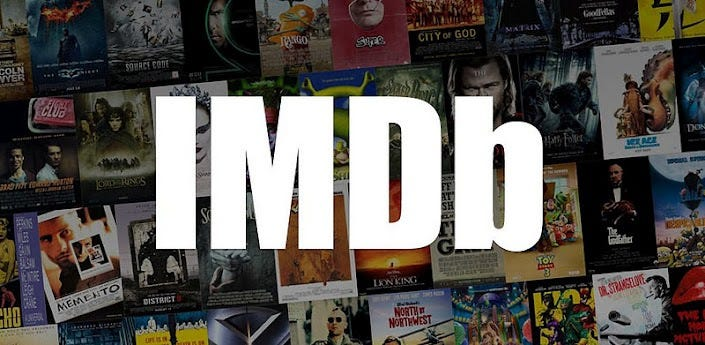

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

The provided code is written in Python and includes several libraries being imported. The `pandas` library is imported and aliased as `pd`, which is commonly used for data manipulation and analysis. The `numpy` library is imported and aliased as `np`, which provides mathematical functions and tools for working with arrays. The `matplotlib` library is imported for data visualization and plotting, and the `pyplot` module is imported as `plt` for creating various types of plots. The `seaborn` library is imported for statistical data visualization, and the `plotly.express` module is imported as `px` for interactive visualizations. Lastly, the `WordCloud` class from the `wordcloud` library is imported along with the `STOPWORDS` variable for creating word cloud visualizations.

In [3]:
imdb_data=pd.read_csv('imdb_top_1000.csv')
imdb_data.head(5) 

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

The code provided reads a CSV file named 'imdb_top_1000.csv' using the `read_csv()` function from the `pandas` library. The resulting data is stored in a DataFrame called `imdb_data`. The `head(5)` function is then called on the DataFrame to display the first five rows of the data.

In [4]:
imdb_data.drop(['Poster_Link', 'Overview'],axis=1,inplace=True) 

The code snippet `imdb_data.drop(['Poster_Link', 'Overview'], axis=1, inplace=True)` removes the columns named 'Poster_Link' and 'Overview' from the DataFrame `imdb_data`. The `drop()` function is called on the DataFrame, specifying the column names to be dropped and setting `axis=1` to indicate that the operation should be performed on columns. The `inplace=True` parameter ensures that the changes are applied directly to the `imdb_data` DataFrame without creating a new DataFrame.

In [5]:
print("The shape of the dataset is: {} rows and {} columns".format(imdb_data.shape[0], imdb_data.shape[1]))

The shape of the dataset is: 1000 rows and 14 columns


The code snippet `print("The shape of the dataset is: {} rows and {} columns".format(imdb_data.shape[0], imdb_data.shape[1]))` prints the shape of the dataset stored in the `imdb_data` DataFrame. The number of rows is accessed using `imdb_data.shape[0]`, and the number of columns is accessed using `imdb_data.shape[1]`. The `format()` method is used to insert these values into the string, and the resulting string is then printed.

In [6]:
imdb_data.info()   #This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


The code `imdb_data.info()` provides information about the `imdb_data` DataFrame. It displays a summary of the DataFrame's structure, including the number of non-null values and data types for each column. This information helps in understanding the data and identifying any missing or inconsistent values.

In [7]:
imdb_data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

The code `imdb_data.isnull().sum()` calculates the number of null values in each column of the `imdb_data` DataFrame. The `isnull()` function is used to generate a boolean mask where `True` indicates a null value, and `False` indicates a non-null value. The `sum()` function is then applied to this boolean mask, which treats `True` as 1 and `False` as 0, resulting in the count of null values for each column. The output of this code provides a summary of the number of missing values in each column of the dataset.

In [8]:
imdb_data['Certificate'].mode()

0    U
Name: Certificate, dtype: object

The code `imdb_data['Certificate'].mode()` calculates the mode (most frequent value) of the 'Certificate' column in the `imdb_data` DataFrame. The `mode()` function is applied to the 'Certificate' column, and it returns a series containing the mode(s) of the column. The output of this code provides the mode(s) of the 'Certificate' column.

In [9]:
imdb_data['Certificate'].fillna('U',inplace=True)

The code `imdb_data['Certificate'].fillna('U', inplace=True)` fills the missing values in the 'Certificate' column of the `imdb_data` DataFrame with the value 'U'. The `fillna()` function is called on the 'Certificate' column, and the missing values are replaced with the specified value. The `inplace=True` parameter ensures that the changes are applied directly to the `imdb_data` DataFrame without creating a new DataFrame. After executing this code, any previously missing values in the 'Certificate' column will be replaced with 'U'.

In [10]:
print(imdb_data['Gross'].head(1))
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '')
print(imdb_data['Gross'].head(1))

imdb_data['Gross'] = imdb_data['Gross'].astype('float64')
imdb_data['Gross'] = imdb_data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


The code snippet performs the following operations on the 'Gross' column of the `imdb_data` DataFrame:

1. `print(imdb_data['Gross'].head(1))`: This line prints the first value in the 'Gross' column.

2. `imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '')`: This line removes commas from the values in the 'Gross' column by replacing them with an empty string.

3. `print(imdb_data['Gross'].head(1))`: This line prints the first value in the 'Gross' column after the comma removal.

4. `imdb_data['Gross'] = imdb_data['Gross'].astype('float64')`: This line converts the data type of the 'Gross' column to 'float64', treating the values as floating-point numbers.

5. `imdb_data['Gross'] = imdb_data['Gross'].replace(np.nan, 0)`: This line replaces any missing values (NaN) in the 'Gross' column with 0.

After executing this code, the 'Gross' column will have commas removed from its values, be converted to the float data type, and any missing values will be replaced with 0.

In [11]:
imdb_data['Gross'] = imdb_data['Gross'].astype(int)

The line of code `imdb_data['Gross'] = imdb_data['Gross'].astype(int)` converts the values in the 'Gross' column of the `imdb_data` DataFrame to the 'int' data type. The `astype()` function is used to perform this conversion. After executing this code, the 'Gross' column will contain integer values instead of floating-point numbers.

In [12]:
imdb_data['Meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

The code `imdb_data['Meta_score'].value_counts()` calculates and displays the count of unique values in the 'Meta_score' column of the `imdb_data` DataFrame. This code provides a summary of the distribution of values in the 'Meta_score' column, showing how many times each unique value appears in the column.

In [13]:
imdb_Nu=imdb_data[[ 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]   #columns with numeric values
imdb_Ob=imdb_data.drop(columns=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'])  # columns with string values
imdb_Nu

IMDB_Rating  Meta_score  No_of_Votes      Gross
0            9.3        80.0      2343110   28341469
1            9.2       100.0      1620367  134966411
2            9.0        84.0      2303232  534858444
3            9.0        90.0      1129952   57300000
4            9.0        96.0       689845    4360000
..           ...         ...          ...        ...
995          7.6        76.0       166544          0
996          7.6        84.0        34075          0
997          7.6        85.0        43374   30500000
998          7.6        78.0        26471          0
999          7.6        93.0        51853          0

[1000 rows x 4 columns]

The code `imdb_Nu = imdb_data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]` creates a new DataFrame called `imdb_Nu` by selecting specific columns ('IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross') from the `imdb_data` DataFrame. These columns are assumed to contain numeric values.

The resulting `imdb_Nu` DataFrame will contain only the selected columns with numeric values.

To complement this, the code `imdb_Ob = imdb_data.drop(columns=['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross'])` creates a new DataFrame called `imdb_Ob` by dropping the columns ('IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross') from the `imdb_data` DataFrame. These columns are assumed to contain string values.

The resulting `imdb_Ob` DataFrame will contain all the columns from `imdb_data` except the ones mentioned, which are assumed to contain string values.

In [14]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(imdb_Nu)
#This method simultaneously performs fit and transform operations on the input data and converts the data points. It will calculate the mean(μ)and standard deviation(σ) of the feature F at a time it will transform the data points of the feature F.
imdb_data_imputed = pd.DataFrame(imputed, columns=imdb_Nu.columns)
imdb_data_imputed

IMDB_Rating  Meta_score  No_of_Votes        Gross
0            9.3        80.0    2343110.0   28341469.0
1            9.2       100.0    1620367.0  134966411.0
2            9.0        84.0    2303232.0  534858444.0
3            9.0        90.0    1129952.0   57300000.0
4            9.0        96.0     689845.0    4360000.0
..           ...         ...          ...          ...
995          7.6        76.0     166544.0          0.0
996          7.6        84.0      34075.0          0.0
997          7.6        85.0      43374.0   30500000.0
998          7.6        78.0      26471.0          0.0
999          7.6        93.0      51853.0          0.0

[1000 rows x 4 columns]

The code snippet utilizes the `KNNImputer` class from the `sklearn.impute` module to impute missing values in the `imdb_Nu` DataFrame.

1. `from sklearn.impute import KNNImputer`: This line imports the `KNNImputer` class from the `sklearn.impute` module, which is used for imputing missing values based on the k-nearest neighbors algorithm.

2. `imputer = KNNImputer(n_neighbors=3)`: This line creates an instance of the `KNNImputer` class with `n_neighbors=3`, indicating that it will consider the three nearest neighbors to impute missing values.

3. `imputed = imputer.fit_transform(imdb_Nu)`: This line fits the imputer to the `imdb_Nu` DataFrame and simultaneously performs the transform operation, imputing missing values based on the k-nearest neighbors algorithm. The result is stored in the `imputed` variable.

4. `imdb_data_imputed = pd.DataFrame(imputed, columns=imdb_Nu.columns)`: This line creates a new DataFrame called `imdb_data_imputed` from the `imputed` array, using the original column names from the `imdb_Nu` DataFrame.

The resulting `imdb_data_imputed` DataFrame contains the imputed values for the missing entries in the numeric columns of `imdb_Nu`, obtained using the k-nearest neighbors imputation technique.

In [15]:
result = pd.concat([imdb_Ob, imdb_data_imputed], axis=1)
result

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944           U   97 min   
999              The 39 Steps          1935           U   86 min   

                        Genre              Director              Star1  \
0                       Drama        Frank Darabont        Tim Robbins   
1                Crime, Drama  Francis Ford Coppola      Marlon Brando   
2        Action, Crime, Drama     Christopher Nolan     Christian Bale   
3                Crime, Drama  Francis Ford Coppola          Al Pacino   
4                Crime, Drama          Sidney Lumet        Henry Fonda   
..                        ...                   ...                ...   
995    Comedy, Drama, Romance         Blake Edwards     Audrey Hepburn   
996            Drama, Western        George Stevens   Elizabeth Taylor   
997       Drama, Romance, War        Fred Zinnemann     Burt Lancaster   
998                Drama, War      Alfred Hitchcock  Tallulah Bankhead   
999  Crime, Mystery, Thriller      Alfred Hitchcock       Robert Donat   

                 Star2           Star3           Star4  IMDB_Rating  \
0       Morgan Freeman      Bob Gunton  William Sadler          9.3   
1            Al Pacino      James Caan    Diane Keaton          9.2   
2         Heath Ledger   Aaron Eckhart   Michael Caine          9.0   
3       Robert De Niro   Robert Duvall    Diane Keaton          9.0   
4          Lee J. Cobb   Martin Balsam    John Fiedler          9.0   
..                 ...             ...             ...          ...   
995     George Peppard   Patricia Neal     Buddy Ebsen          7.6   
996        Rock Hudson      James Dean   Carroll Baker          7.6   
997   Montgomery Clift    Deborah Kerr      Donna Reed          7.6   
998        John Hodiak   Walter Slezak  William Bendix          7.6   
999  Madeleine Carroll  Lucie Mannheim  Godfrey Tearle          7.6   

     Meta_score  No_of_Votes        Gross  
0          80.0    2343110.0   28341469.0  
1         100.0    1620367.0  134966411.0  
2          84.0    2303232.0  534858444.0  
3          90.0    1129952.0   57300000.0  
4          96.0     689845.0    4360000.0  
..          ...          ...          ...  
995        76.0     166544.0          0.0  
996        84.0      34075.0          0.0  
997        85.0      43374.0   30500000.0  
998        78.0      26471.0          0.0  
999        93.0      51853.0          0.0  

[1000 rows x 14 columns]

The code `result = pd.concat([imdb_Ob, imdb_data_imputed], axis=1)` concatenates the `imdb_Ob` DataFrame (containing columns with string values) and `imdb_data_imputed` DataFrame (containing imputed values for numeric columns) along the columns (axis=1). The resulting DataFrame, stored in the `result` variable, combines the string columns from `imdb_Ob` with the imputed numeric columns from `imdb_data_imputed`. This creates a merged DataFrame that contains both the original string columns and the imputed numeric columns.

In [16]:
#Missing data 
features_stat =result.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(result))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

feature  num_of_missing  percentage_of_missings
0    Series_Title               0                     0.0
1   Released_Year               0                     0.0
2     Certificate               0                     0.0
3         Runtime               0                     0.0
4           Genre               0                     0.0
5        Director               0                     0.0
6           Star1               0                     0.0
7           Star2               0                     0.0
8           Star3               0                     0.0
9           Star4               0                     0.0
10    IMDB_Rating               0                     0.0
11     Meta_score               0                     0.0
12    No_of_Votes               0                     0.0
13          Gross               0                     0.0

The code provided calculates and displays statistics about missing data in the `result` DataFrame:

1. `features_stat = result.isna().sum().rename('num_of_missing').reset_index()`: This line calculates the number of missing values for each feature in the `result` DataFrame using the `isna().sum()` function. The resulting series is renamed as 'num_of_missing' and reset with a new index to create a DataFrame called `features_stat`.

2. `features_stat.columns = ['feature', 'num_of_missing']`: This line updates the column names of the `features_stat` DataFrame to 'feature' and 'num_of_missing'.

3. `features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(result))`: This line calculates the percentage of missing values for each feature by dividing the 'num_of_missing' column by the total length of the `result` DataFrame. The result is stored in a new column called 'percentage_of_missings'.

4. `features_stat.sort_values(by='percentage_of_missings', ascending=False)`: This line sorts the `features_stat` DataFrame in descending order based on the 'percentage_of_missings' column, providing a summary of features with the highest percentage of missing values.

The resulting `features_stat` DataFrame contains information about the number of missing values, the percentage of missing values, and sorts the features accordingly.

In [17]:
result.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

The code `result.isnull().sum()` calculates the number of missing values in each column of the `result` DataFrame. The `isnull()` function generates a boolean mask where `True` indicates a missing value (NaN), and `False` indicates a non-null value. The `sum()` function is then applied to this boolean mask, which treats `True` as 1 and `False` as 0, resulting in the count of missing values for each column. The output of this code provides a summary of the number of missing values in each column of the `result` DataFrame.

In [18]:
result["Runtime"] = result["Runtime"].str.extract('([^\s]+)')   #extracting numbers before whitespace
result["Runtime"] = result["Runtime"].astype(int)   #changing the dtype of extracted numbers to int

The code provided performs the following operations on the 'Runtime' column of the `result` DataFrame:

1. `result["Runtime"] = result["Runtime"].str.extract('([^\s]+)')`: This line extracts the numbers before the whitespace in each value of the 'Runtime' column using regular expression pattern matching. The `str.extract()` function is applied to the 'Runtime' column, and the pattern `'([^\s]+)'` captures all non-whitespace characters. The extracted values are then assigned back to the 'Runtime' column.

2. `result["Runtime"] = result["Runtime"].astype(int)`: This line converts the values in the 'Runtime' column to the 'int' data type using the `astype()` function. After executing this code, the 'Runtime' column will contain integer values instead of strings.

Overall, this code extracts the numeric values before the whitespace in the 'Runtime' column and converts them to integers.

In [19]:
result['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

The code `result['Released_Year'].value_counts()` calculates and displays the count of unique values in the 'Released_Year' column of the `result` DataFrame. This code provides a summary of the distribution of values in the 'Released_Year' column, showing how many times each unique year appears in the column.

In [20]:
#drop row contain 'PG' to convert the column to int datatype
result = result.drop(labels=966, axis=0)

The code `result = result.drop(labels=966, axis=0)` drops the row at index 966 from the `result` DataFrame. This is done using the `drop()` function, specifying the `labels` parameter as 966 to indicate the index label of the row to be dropped, and setting `axis=0` to indicate that the operation should be performed on rows.

By dropping this specific row, which contains 'PG' in the 'Certificate' column, it is assumed that the intention is to remove it in order to convert the column to the integer data type. After executing this code, the `result` DataFrame will no longer include the row with index label 966.

In [21]:
result['Released_Year']=result['Released_Year'].astype(int)

The code `result['Released_Year'] = result['Released_Year'].astype(int)` converts the 'Released_Year' column in the `result` DataFrame to the 'int' data type using the `astype()` function. After executing this code, the values in the 'Released_Year' column will be represented as integers instead of strings.

In [22]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

The code `sns.set(style="ticks", context="talk")` sets the default style and context settings for Seaborn plots. The `style="ticks"` sets the style to have ticks on the axes, and the `context="talk"` sets the plot context to a larger size suitable for display in a talk or presentation.

The code `plt.style.use("dark_background")` sets the plot style to "dark_background" using the `use()` function from Matplotlib's `pyplot.style` module. This style applies a dark background color to the plots, which can be useful for creating a visually appealing and distinctive plot appearance.

These code snippets, in combination, configure the plot style and context settings to create Seaborn plots with ticks on the axes and a larger size, and set the plot background to a dark color.

In [23]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int32  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int32  
 4   Genre          999 non-null    object 
 5   Director       999 non-null    object 
 6   Star1          999 non-null    object 
 7   Star2          999 non-null    object 
 8   Star3          999 non-null    object 
 9   Star4          999 non-null    object 
 10  IMDB_Rating    999 non-null    float64
 11  Meta_score     999 non-null    float64
 12  No_of_Votes    999 non-null    float64
 13  Gross          999 non-null    float64
dtypes: float64(4), int32(2), object(8)
memory usage: 109.3+ KB


The code `result.info()` provides information about the `result` DataFrame. It displays a summary of the DataFrame's structure, including the data types and the count of non-null values for each column. This information is helpful for understanding the data and verifying the data types of the columns after performing any transformations or conversions.

In [24]:
result.describe()

Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     999.000000  999.000000   999.000000  999.000000  9.990000e+02   
mean     1991.217217  122.873874     7.949650   78.260928  2.736974e+05   
std        23.297025   28.102520     0.275407   11.684869  3.275366e+05   
min      1920.000000   45.000000     7.600000   28.000000  2.508800e+04   
25%      1976.000000  103.000000     7.700000   72.000000  5.547150e+04   
50%      1999.000000  119.000000     7.900000   79.000000  1.383560e+05   
75%      2009.000000  137.000000     8.100000   86.000000  3.744775e+05   
max      2020.000000  321.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  9.990000e+02  
mean   5.641946e+07  
std    1.032231e+08  
min    0.000000e+00  
25%    4.422285e+05  
50%    1.068028e+07  
75%    6.139004e+07  
max    9.366622e+08

The code `result.describe()` generates descriptive statistics for the numerical columns in the `result` DataFrame. It provides information such as count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value for each numerical column. This summary statistics helps in understanding the distribution and central tendency of the data in the DataFrame.

In [25]:
result.corr()

C:\Users\91915\AppData\Local\Temp\ipykernel_1008\76870456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165807    -0.131053   -0.284450     0.241785   
Runtime             0.165807  1.000000     0.244112   -0.017840     0.173304   
IMDB_Rating        -0.131053  0.244112     1.000000    0.255639     0.495361   
Meta_score         -0.284450 -0.017840     0.255639    1.000000    -0.033619   
No_of_Votes         0.241785  0.173304     0.495361   -0.033619     1.000000   
Gross               0.250435  0.143354     0.083947   -0.064244     0.602533   

                  Gross  
Released_Year  0.250435  
Runtime        0.143354  
IMDB_Rating    0.083947  
Meta_score    -0.064244  
No_of_Votes    0.602533  
Gross          1.000000

The code `result.corr()` calculates the pairwise correlation between the columns of the `result` DataFrame. It returns a correlation matrix, where each element represents the correlation coefficient between two columns.

The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

The resulting correlation matrix provides valuable insights into the relationships between the variables in the DataFrame, helping to identify patterns, dependencies, and potential multicollinearity.

C:\Users\91915\AppData\Local\Temp\ipykernel_1008\3661690383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result.corr()) #a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart. that shows us how closely related different variables are.


<Axes: >

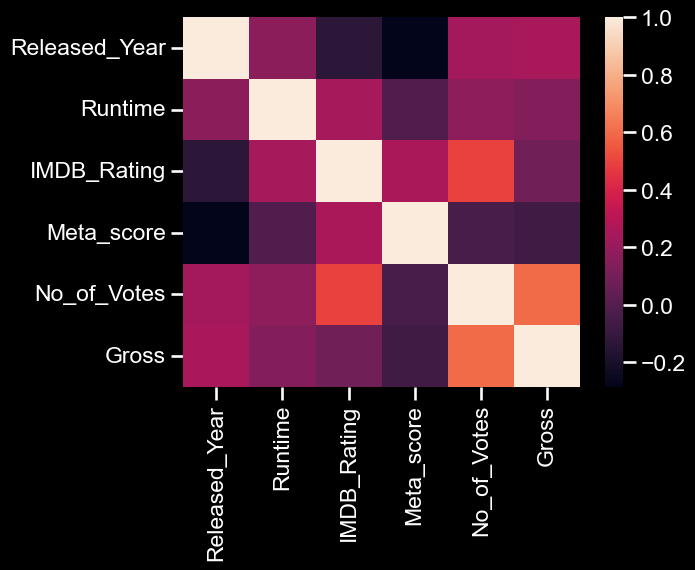

In [26]:
sns.heatmap(result.corr()) #a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart. that shows us how closely related different variables are.

The code `sns.heatmap(result.corr())` creates a heatmap visualization of the correlation matrix calculated from the `result` DataFrame using the `corr()` function. The `heatmap()` function from Seaborn is used to generate a color-coded representation of the correlation values.

In the heatmap, each cell represents the correlation coefficient between two variables. The color scale indicates the strength and direction of the correlation, with lighter colors indicating higher positive correlation, darker colors indicating higher negative correlation, and neutral colors representing no or weak correlation.

By visualizing the correlation matrix with a heatmap, it becomes easier to identify the relationships and patterns among the variables in the `result` DataFrame.

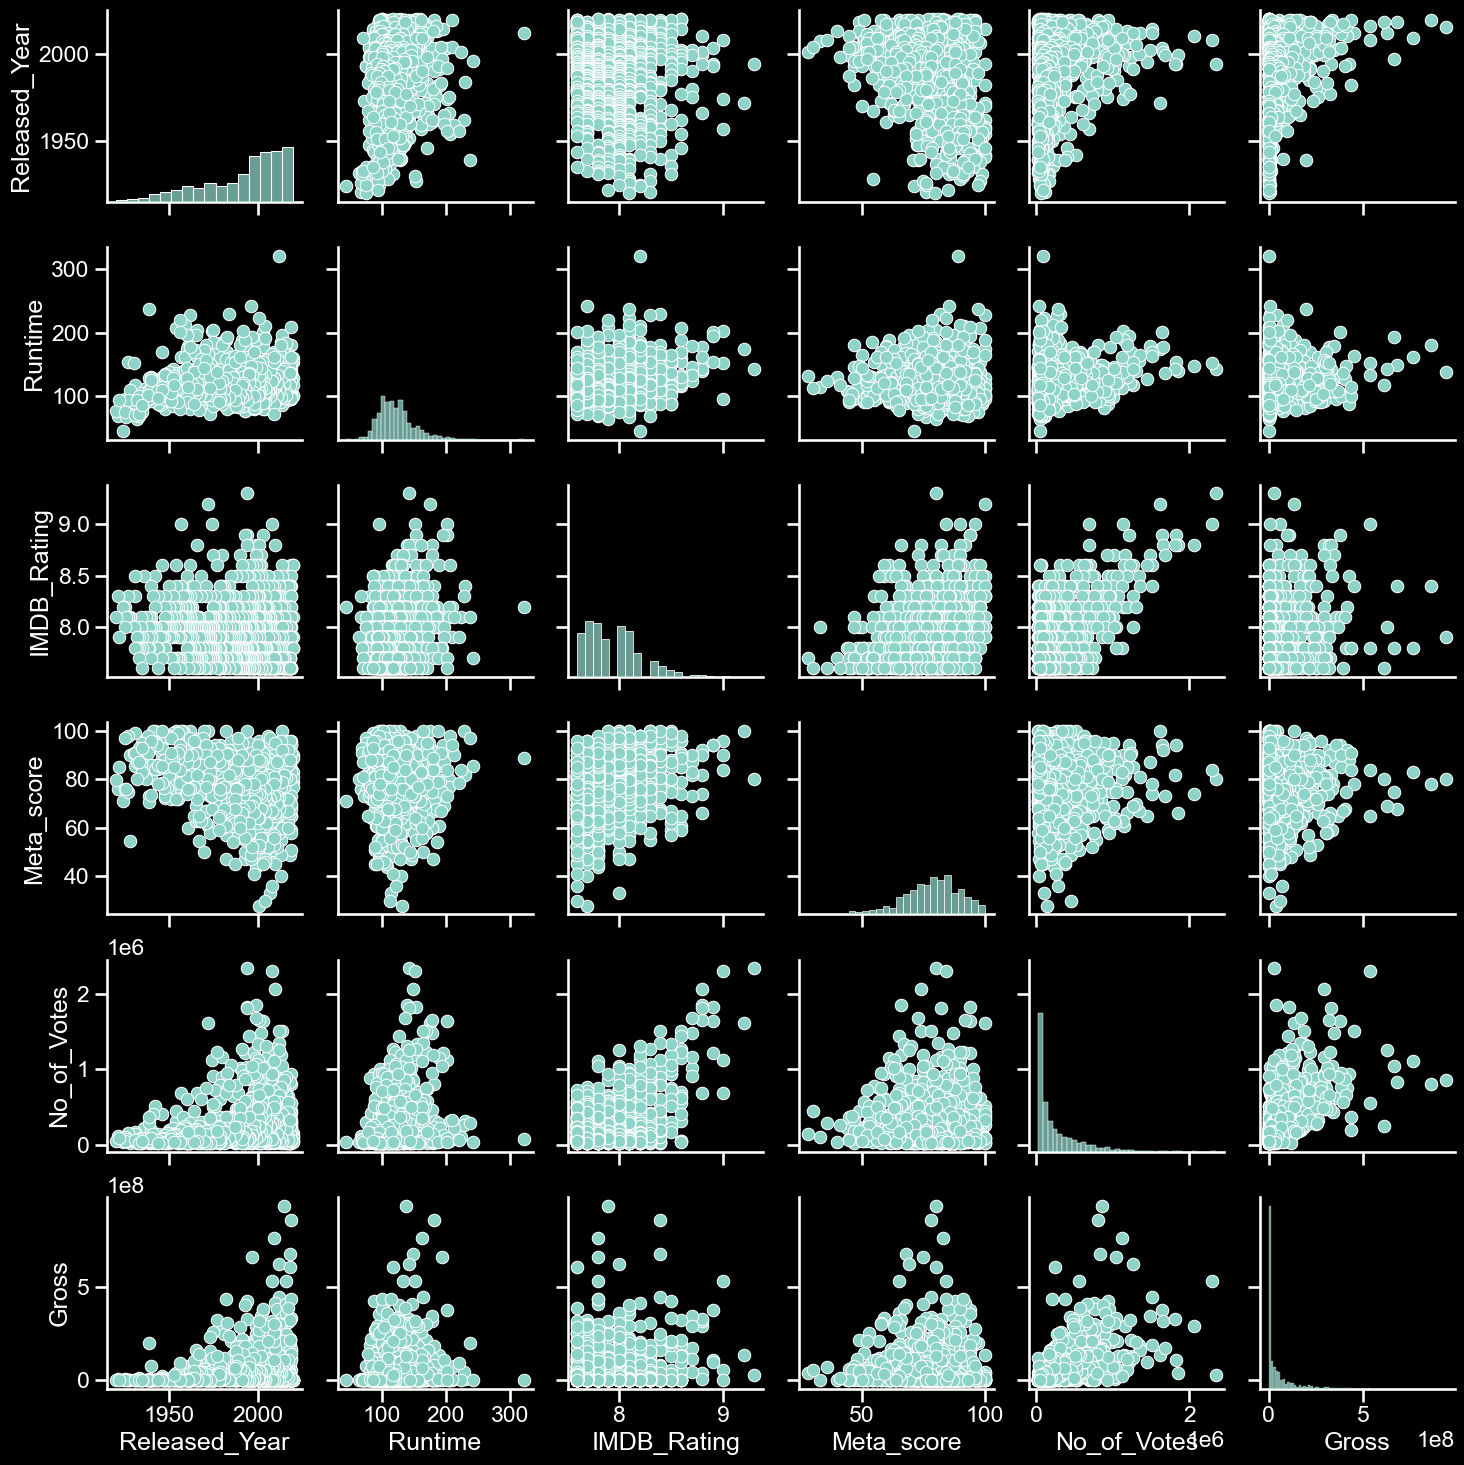

In [27]:
sns.pairplot(result) #THIS SHOWS THE RELATIONSHIP BETWEEN EACH COLUMN

The code `sns.pairplot(result)` creates a pair plot using Seaborn to visualize the relationships between pairs of variables in the `result` DataFrame. It plots scatter plots for numerical variables against each other and histograms for the diagonal axes.

The pair plot is a useful tool for understanding the pairwise relationships and distributions within the dataset. It helps to identify any patterns, trends, or potential outliers in the data. Each scatter plot shows the relationship between two variables, while the histograms display the distribution of each variable individually.

By examining the pair plot, you can gain insights into the relationships and distributions of the variables in the `result` DataFrame.

In [28]:
result.head()

Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           A      142   
1             The Godfather           1972           A      175   
2           The Dark Knight           2008          UA      152   
3    The Godfather: Part II           1974           A      202   
4              12 Angry Men           1957           U       96   

                  Genre              Director           Star1           Star2  \
0                 Drama        Frank Darabont     Tim Robbins  Morgan Freeman   
1          Crime, Drama  Francis Ford Coppola   Marlon Brando       Al Pacino   
2  Action, Crime, Drama     Christopher Nolan  Christian Bale    Heath Ledger   
3          Crime, Drama  Francis Ford Coppola       Al Pacino  Robert De Niro   
4          Crime, Drama          Sidney Lumet     Henry Fonda     Lee J. Cobb   

           Star3           Star4  IMDB_Rating  Meta_score  No_of_Votes  \
0     Bob Gunton  William Sadler          9.3        80.0    2343110.0   
1     James Caan    Diane Keaton          9.2       100.0    1620367.0   
2  Aaron Eckhart   Michael Caine          9.0        84.0    2303232.0   
3  Robert Duvall    Diane Keaton          9.0        90.0    1129952.0   
4  Martin Balsam    John Fiedler          9.0        96.0     689845.0   

         Gross  
0   28341469.0  
1  134966411.0  
2  534858444.0  
3   57300000.0  
4    4360000.0

The code `result.head()` displays the first few rows of the `result` DataFrame. This provides a preview of the data, showing the top rows and the columns present in the DataFrame. By default, `head()` displays the first five rows, but you can specify a different number in the parentheses to display a specific number of rows.

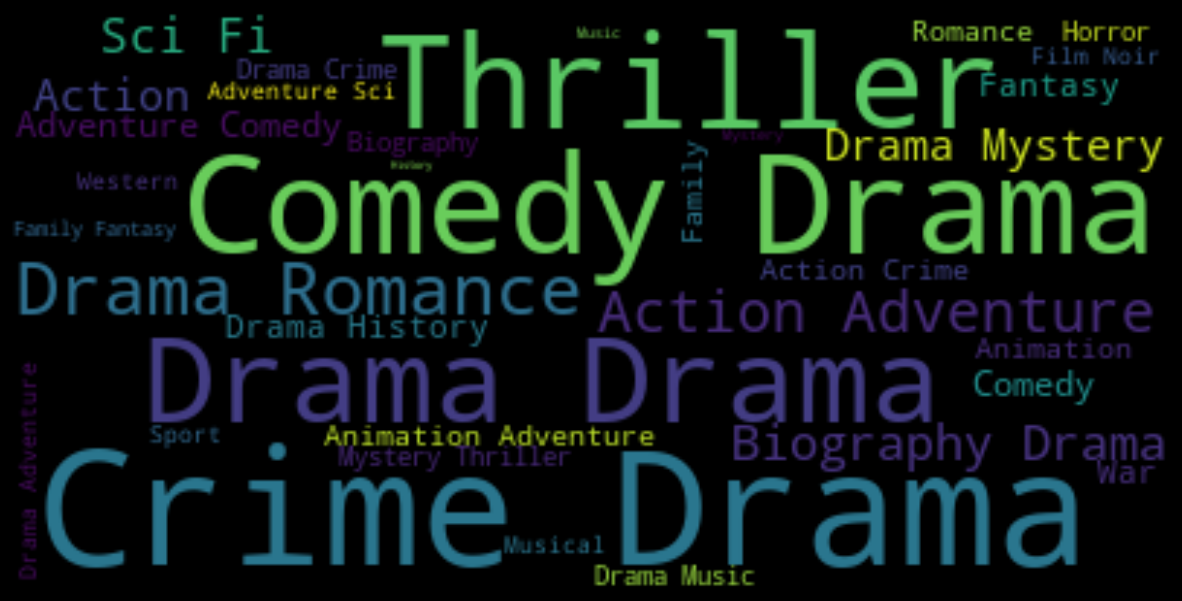

In [29]:
text = " ".join(i for i in result.Genre)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code provided generates a word cloud visualization based on the 'Genre' column in the `result` DataFrame.

1. `text = " ".join(i for i in result.Genre)`: This line joins all the values in the 'Genre' column into a single string called `text`. Each value is separated by a space.

2. `stopwords = set(STOPWORDS)`: This line creates a set of stopwords using the `STOPWORDS` variable from the `wordcloud` library. Stopwords are commonly used words (e.g., "a", "the", "and") that are typically removed from text analysis to focus on more meaningful words.

3. `wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)`: This line creates a word cloud using the `WordCloud` class from the `wordcloud` library. The stopwords are passed as an argument, and the background color is set to black. The `generate()` function is called on `text` to generate the word cloud based on the frequency of words.

4. `plt.figure(figsize=(15,10))`: This line sets the size of the figure that will display the word cloud.

5. `plt.imshow(wordcloud, interpolation='bilinear')`: This line displays the word cloud image using the `imshow()` function from `matplotlib.pyplot`. The 'bilinear' interpolation is used to smooth the image.

6. `plt.axis("off")`: This line turns off the axes and axis labels.

7. `plt.show()`: This line displays the word cloud plot.

The resulting word cloud provides a visual representation of the most frequent words in the 'Genre' column of the `result` DataFrame, with more common words appearing larger in the word cloud.

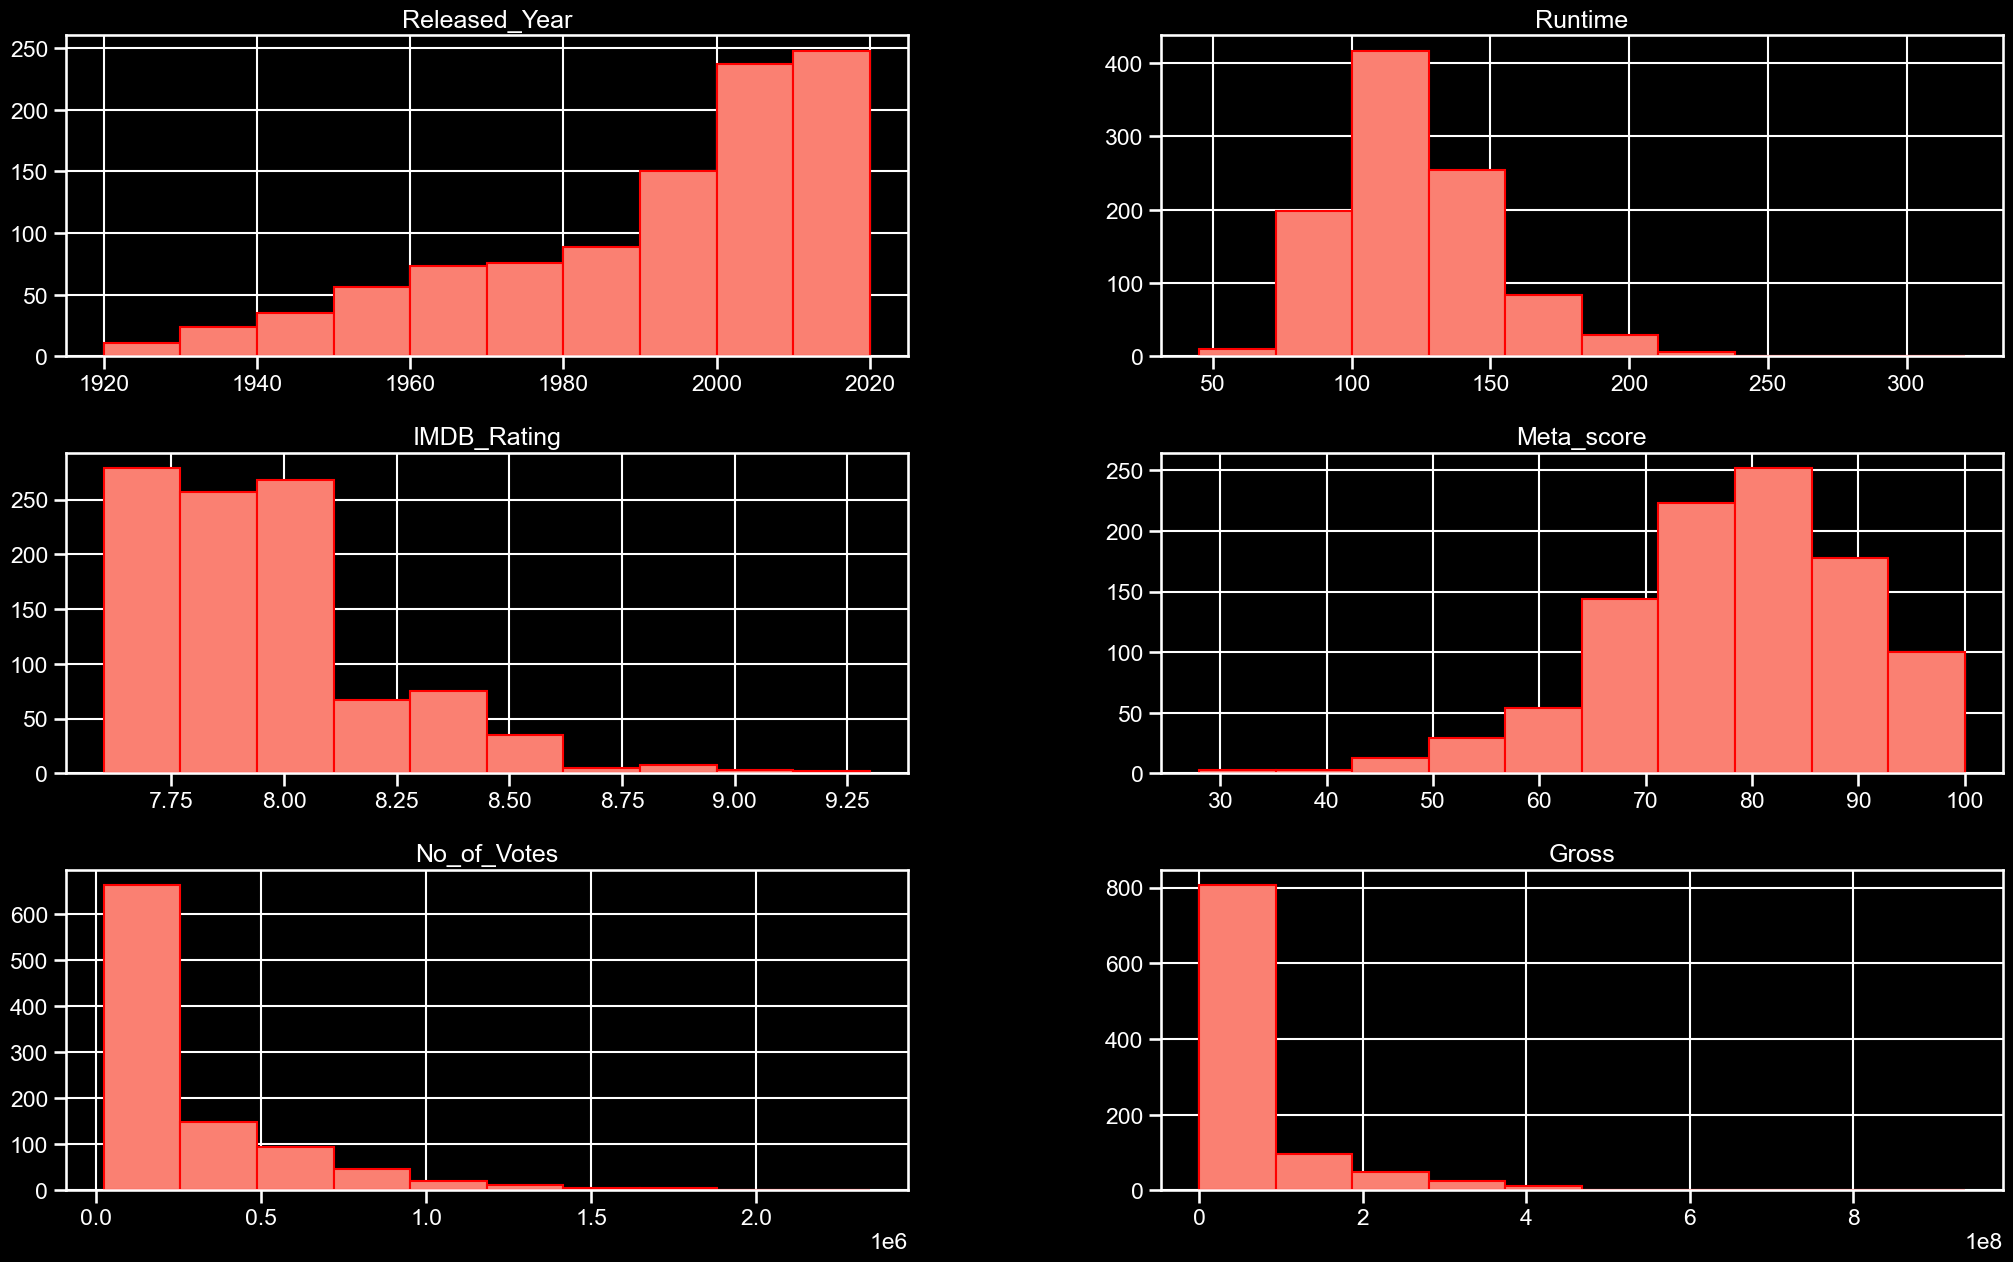

In [30]:
numerical_attributes = ['Released_Year','Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
result[numerical_attributes].hist(figsize = (25, 15), color = 'salmon', edgecolor = 'red');

The code snippet generates histograms for the specified numerical attributes from the `result` DataFrame.

1. `numerical_attributes = ['Released_Year','Runtime','IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']`: This line defines a list called `numerical_attributes` that contains the names of the columns for which histograms will be created.

2. `result[numerical_attributes].hist(figsize=(25, 15), color='salmon', edgecolor='red')`: This line selects the specified numerical attributes from the `result` DataFrame and uses the `hist()` function to create histograms for each attribute. The `figsize` parameter sets the size of the resulting figure, `color` sets the color of the histogram bars, and `edgecolor` sets the color of the bar edges.

The resulting histograms are displayed in a single figure, with each attribute having its own histogram. The `figsize`, `color`, and `edgecolor` parameters can be adjusted to customize the appearance of the histograms.

In [31]:
result.sort_values(by='Gross',ascending=False).head(5)

Series_Title  Released_Year Certificate  \
477  Star Wars: Episode VII - The Force Awakens           2015           U   
59                            Avengers: Endgame           2019          UA   
623                                      Avatar           2009          UA   
60                       Avengers: Infinity War           2018          UA   
652                                     Titanic           1997          UA   

     Runtime                       Genre       Director              Star1  \
477      138   Action, Adventure, Sci-Fi    J.J. Abrams       Daisy Ridley   
59       181    Action, Adventure, Drama  Anthony Russo          Joe Russo   
623      162  Action, Adventure, Fantasy  James Cameron    Sam Worthington   
60       149   Action, Adventure, Sci-Fi  Anthony Russo          Joe Russo   
652      194              Drama, Romance  James Cameron  Leonardo DiCaprio   

                 Star2             Star3               Star4  IMDB_Rating  \
477        John Boyega       Oscar Isaac    Domhnall Gleeson          7.9   
59   Robert Downey Jr.       Chris Evans        Mark Ruffalo          8.4   
623        Zoe Saldana  Sigourney Weaver  Michelle Rodriguez          7.8   
60   Robert Downey Jr.   Chris Hemsworth        Mark Ruffalo          8.4   
652       Kate Winslet        Billy Zane         Kathy Bates          7.8   

     Meta_score  No_of_Votes        Gross  
477        80.0     860823.0  936662225.0  
59         78.0     809955.0  858373000.0  
623        83.0    1118998.0  760507625.0  
60         68.0     834477.0  678815482.0  
652        75.0    1046089.0  659325379.0

The code `result.sort_values(by='Gross', ascending=False).head(5)` sorts the `result` DataFrame in descending order based on the 'Gross' column and displays the top 5 rows with the highest gross values.

This code snippet retrieves the rows with the highest gross values, allowing you to identify the movies or data entries that generated the highest revenue. The DataFrame will be sorted in descending order based on the 'Gross' column, and the `head(5)` function will display the top 5 rows with the highest gross values.

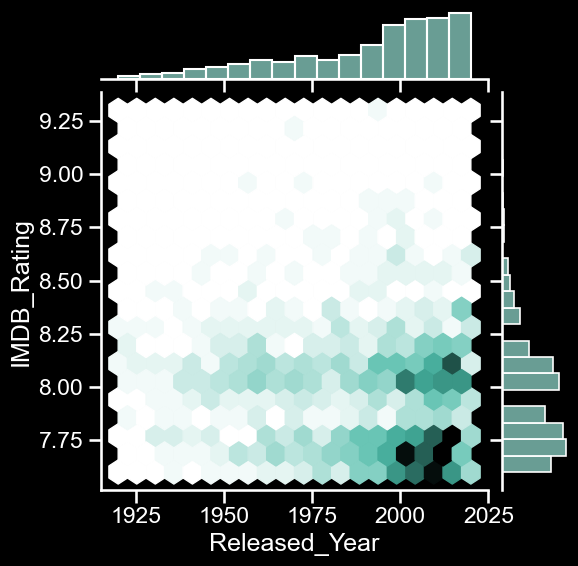

In [32]:
sns.jointplot(data=result, x='Released_Year', y='IMDB_Rating', kind="hex")

The code `sns.jointplot(data=result, x='Released_Year', y='IMDB_Rating', kind="hex")` creates a joint plot using Seaborn to visualize the relationship between the 'Released_Year' and 'IMDB_Rating' columns in the `result` DataFrame.

The joint plot combines a scatter plot and a histogram to display the bivariate distribution between the two variables. The 'Released_Year' is plotted on the x-axis, 'IMDB_Rating' on the y-axis, and a hexagonal binning technique is used to represent the density of points in the plot.

This type of plot is useful for understanding the relationship and distribution between two variables. The hexagonal bins provide an indication of the concentration of points, with darker areas indicating a higher density of data points.

By examining this joint plot, you can gain insights into the distribution and correlation between the release year and IMDB ratings in the `result` DataFrame.

In [33]:
ratings_data=result[['Released_Year','IMDB_Rating']]
ratings_data=ratings_data.groupby(by='Released_Year').agg(np.mean)
ratings_data

IMDB_Rating
Released_Year             
1920              8.100000
1921              8.300000
1922              7.900000
1924              8.200000
1925              8.100000
...                    ...
2016              7.935714
2017              7.890909
2018              7.994737
2019              7.995652
2020              8.133333

[99 rows x 1 columns]

The code snippet performs grouping and aggregation operations on the `result` DataFrame to calculate the average IMDB rating for each released year.

1. `ratings_data = result[['Released_Year','IMDB_Rating']]`: This line creates a new DataFrame called `ratings_data` by selecting the 'Released_Year' and 'IMDB_Rating' columns from the `result` DataFrame.

2. `ratings_data = ratings_data.groupby(by='Released_Year').agg(np.mean)`: This line groups the `ratings_data` DataFrame by the 'Released_Year' column and calculates the mean (average) IMDB rating for each released year using the `agg()` function with `np.mean` as the aggregation function.

The resulting `ratings_data` DataFrame contains the released years as the index and the corresponding average IMDB ratings for each year. This provides a summary of the average ratings for different released years in the dataset.

<Axes: xlabel='Released_Year', ylabel='IMDB_Rating'>

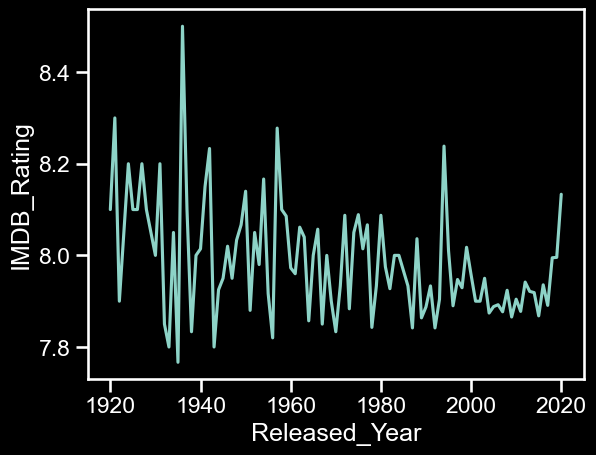

In [34]:
sns.lineplot(data=ratings_data,x= ratings_data.index , y = 'IMDB_Rating')

The code `sns.lineplot(data=ratings_data, x=ratings_data.index, y='IMDB_Rating')` creates a line plot using Seaborn to visualize the trend of average IMDB ratings over the years.

- `data=ratings_data` specifies the DataFrame `ratings_data` as the data source for the line plot.
- `x=ratings_data.index` sets the x-axis values to the index of the `ratings_data` DataFrame, which represents the released years.
- `y='IMDB_Rating'` specifies the 'IMDB_Rating' column as the values for the y-axis.

This line plot displays the average IMDB ratings over the years, connecting the data points with lines to visualize the trend. It helps to understand how the average ratings have evolved over time and identify any patterns or changes in the ratings across different years.

In [35]:
runtime_data=result[['Runtime','IMDB_Rating']]
runtime_data=runtime_data.groupby(by='Runtime').agg(np.mean)
runtime_data

IMDB_Rating
Runtime             
45               8.2
64               7.9
67               8.1
68               8.3
69               7.8
...              ...
228              8.3
229              8.4
238              8.1
242              7.7
321              8.2

[140 rows x 1 columns]

The code snippet performs grouping and aggregation operations on the `result` DataFrame to calculate the average IMDB rating for each runtime duration.

1. `runtime_data = result[['Runtime','IMDB_Rating']]`: This line creates a new DataFrame called `runtime_data` by selecting the 'Runtime' and 'IMDB_Rating' columns from the `result` DataFrame.

2. `runtime_data = runtime_data.groupby(by='Runtime').agg(np.mean)`: This line groups the `runtime_data` DataFrame by the 'Runtime' column and calculates the mean (average) IMDB rating for each runtime duration using the `agg()` function with `np.mean` as the aggregation function.

The resulting `runtime_data` DataFrame contains the runtime durations as the index and the corresponding average IMDB ratings for each duration. This provides a summary of the average ratings for different runtime durations in the dataset.

C:\Users\91915\anaconda3\lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\91915\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


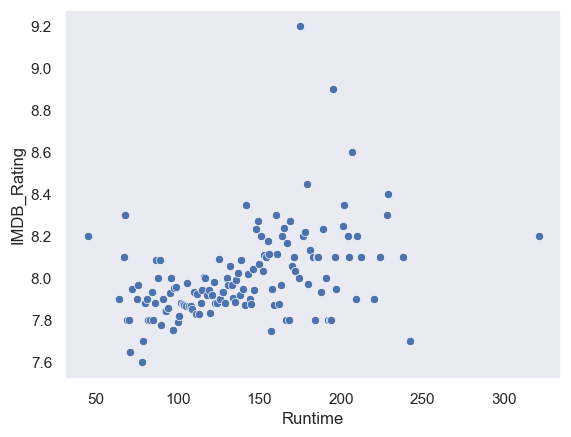

In [36]:
sns.set(style='dark',)
res=sns.scatterplot(data=runtime_data,x= runtime_data.index , y = 'IMDB_Rating' , cmap="Blues")
plt.show()

The code snippet sets the plotting style to 'dark' using `sns.set(style='dark')` and creates a scatter plot using Seaborn to visualize the relationship between the runtime durations and the average IMDB ratings.

1. `res = sns.scatterplot(data=runtime_data, x=runtime_data.index, y='IMDB_Rating', cmap="Blues")`: This line creates a scatter plot using the `scatterplot()` function from Seaborn. The `data` parameter is set to `runtime_data`, the x-axis values are set to the index of `runtime_data`, representing the runtime durations, and the y-axis values are set to the 'IMDB_Rating' column. The `cmap` parameter sets the color map to "Blues", which will be used to color the points.

2. `plt.show()`: This line displays the scatter plot.

The resulting scatter plot visualizes the relationship between runtime durations and average IMDB ratings. Each point represents a runtime duration, and the y-coordinate represents the corresponding average IMDB rating. The color of the points may vary based on the 'Blues' color map. This plot can help identify any trends or patterns between runtime and ratings in the dataset.

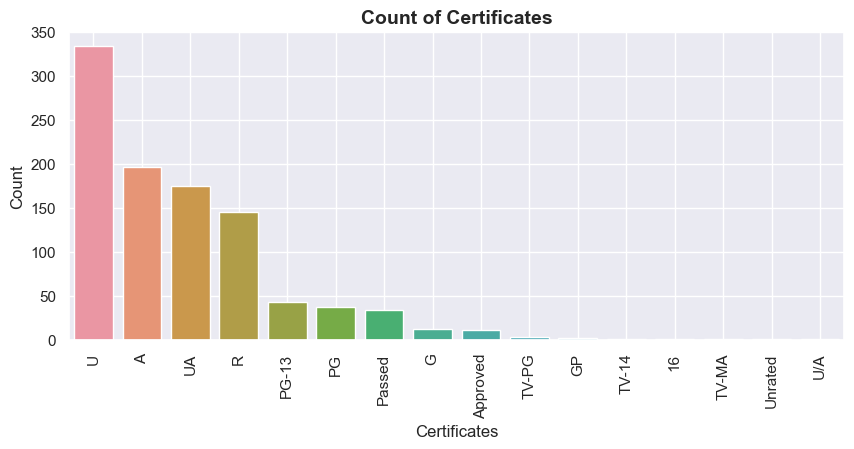

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(x="Certificate", data=result, order = result['Certificate'].value_counts().index)   #here we are using seaborn as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')
plt.title('Count of Certificates',fontsize=14, fontweight ="bold")    #labelling the data
plt.ylabel('Count',fontsize=12)                 #labelling the y-label
plt.xlabel('Certificates',fontsize=12) #labelling the x-label
plt.grid()
plt.show()

The code snippet generates a count plot using Seaborn to visualize the distribution of certificate types in the `result` DataFrame.

1. `plt.figure(figsize=(10,4))`: This line sets the figure size for the plot.

2. `sns.countplot(x="Certificate", data=result, order=result['Certificate'].value_counts().index)`: This line creates a count plot using Seaborn's `countplot()` function. The `x` parameter is set to "Certificate" to specify the column to be plotted, and the `data` parameter is set to `result` DataFrame. The `order` parameter ensures that the bars are ordered based on the count of each certificate type.

3. `plt.xticks(rotation='vertical')`: This line rotates the x-axis tick labels vertically for better readability.

4. `plt.title('Count of Certificates', fontsize=14, fontweight="bold")`: This line sets the title of the plot.

5. `plt.ylabel('Count', fontsize=12)`: This line sets the label for the y-axis.

6. `plt.xlabel('Certificates', fontsize=12)`: This line sets the label for the x-axis.

7. `plt.grid()`: This line adds a grid to the plot.

8. `plt.show()`: This line displays the plot.

The resulting count plot provides a visual representation of the frequency distribution of certificate types in the dataset, showing the count of each certificate type on the y-axis.

In [38]:
result['Director'].value_counts().head(5)

Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Name: Director, dtype: int64

The code `result['Director'].value_counts().head(5)` calculates and displays the count of occurrences for each unique value in the 'Director' column of the `result` DataFrame. It then shows the top 5 directors with the highest count of movies.

This code allows you to identify the directors who have the highest number of movies in the dataset based on the 'Director' column. The output displays the directors and their corresponding counts, with the `head(5)` function limiting the output to the top 5 directors.

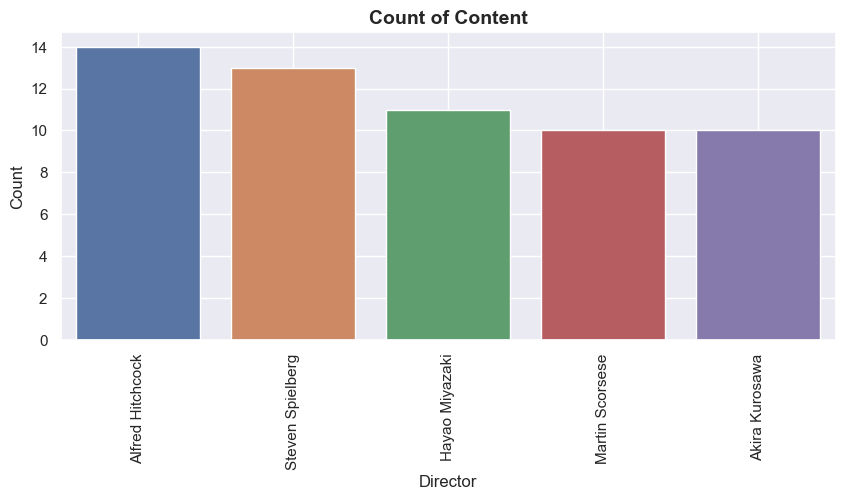

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(x='Director', data=result, order = result['Director'].value_counts().head(5).index)   #here we are using seaborn as sns which is an in-nuilt library in python that uses mtplotlib underneath to plot graphs.
plt.xticks(rotation='vertical')
plt.title('Count of Content',fontsize=14, fontweight ="bold")    #labelling the data
plt.ylabel('Count',fontsize=12)                 #labelling the y-label
plt.xlabel('Director',fontsize=12) #labelling the x-label
plt.grid()
plt.show()

The code snippet generates a count plot using Seaborn to visualize the distribution of movie counts for the top 5 directors in the `result` DataFrame.

1. `plt.figure(figsize=(10,4))`: This line sets the figure size for the plot.

2. `sns.countplot(x='Director', data=result, order=result['Director'].value_counts().head(5).index)`: This line creates a count plot using Seaborn's `countplot()` function. The `x` parameter is set to "Director" to specify the column to be plotted, and the `data` parameter is set to the `result` DataFrame. The `order` parameter ensures that the bars are ordered based on the count of movies for each director, and the `head(5)` function limits the output to the top 5 directors.

3. `plt.xticks(rotation='vertical')`: This line rotates the x-axis tick labels vertically for better readability.

4. `plt.title('Count of Content', fontsize=14, fontweight="bold")`: This line sets the title of the plot.

5. `plt.ylabel('Count', fontsize=12)`: This line sets the label for the y-axis.

6. `plt.xlabel('Director', fontsize=12)`: This line sets the label for the x-axis.

7. `plt.grid()`: This line adds a grid to the plot.

8. `plt.show()`: This line displays the plot.

The resulting count plot provides a visual representation of the movie counts for the top 5 directors in the dataset, showing the count of movies on the y-axis.

In [40]:
px.scatter(result,x= 'IMDB_Rating' , y = 'Gross', title='Gross vs. IMDB Rating', size="No_of_Votes" ,template= "plotly_dark")

The code snippet uses the Plotly Express library to create a scatter plot with interactive capabilities. It visualizes the relationship between the 'IMDB_Rating' and 'Gross' columns from the `result` DataFrame.

1. `px.scatter(result, x='IMDB_Rating', y='Gross', title='Gross vs. IMDB Rating', size="No_of_Votes", template="plotly_dark")`: This line uses Plotly Express to create a scatter plot. The `result` DataFrame is specified as the data source. The 'IMDB_Rating' column is mapped to the x-axis, the 'Gross' column is mapped to the y-axis. The `size` parameter is set to "No_of_Votes" to determine the size of the markers based on the number of votes. The `title` parameter sets the title of the plot, and the `template` parameter sets the plot template to "plotly_dark" for a dark background.

This scatter plot allows you to interactively explore the relationship between the IMDb ratings and the gross earnings of the movies in the dataset. The size of the markers represents the number of votes. Additionally, the Plotly Express library offers zooming, panning, and hover interactions to provide a rich and interactive visualization experience.

In [41]:
df2=result[['Director','IMDB_Rating']]
a=df2[df2['Director'].isin(['Alfred Hitchcock','Steven Spielberg','Hayao Miyazaki','Martin Scorsese','Akira Kurosawa'])]
a=a.groupby(by='Director')['IMDB_Rating'].max()
a = pd.DataFrame({'Director':a.index, 'IMDB_Rating':a.values})
a

Director  IMDB_Rating
0    Akira Kurosawa          8.6
1  Alfred Hitchcock          8.5
2    Hayao Miyazaki          8.6
3   Martin Scorsese          8.7
4  Steven Spielberg          8.9

The code snippet filters the `result` DataFrame based on specific directors and selects the maximum IMDB rating for each director. The result is then stored in a new DataFrame called `a`.

1. `df2 = result[['Director','IMDB_Rating']]`: This line creates a new DataFrame `df2` by selecting the 'Director' and 'IMDB_Rating' columns from the `result` DataFrame.

2. `a = df2[df2['Director'].isin(['Alfred Hitchcock','Steven Spielberg','Hayao Miyazaki','Martin Scorsese','Akira Kurosawa'])]`: This line filters the `df2` DataFrame based on the directors specified in the `isin()` function. It selects the rows where the 'Director' column matches any of the specified directors.

3. `a = a.groupby(by='Director')['IMDB_Rating'].max()`: This line groups the filtered DataFrame `a` by the 'Director' column and calculates the maximum IMDB rating for each director using the `max()` function.

4. `a = pd.DataFrame({'Director': a.index, 'IMDB_Rating': a.values})`: This line creates a new DataFrame called `a` using a dictionary. The 'Director' column is assigned the index values of the `a` series, representing the directors, and the 'IMDB_Rating' column is assigned the values of the `a` series, representing the maximum IMDB ratings.

The resulting `a` DataFrame contains the directors and their corresponding maximum IMDB ratings, providing a summary of the highest ratings achieved by each director among the specified ones.

In [42]:
fig = px.bar(a, x="Director", y='IMDB_Rating', title='5 Directors Average IMDB Rating that have most content')
fig.show()

The code `fig = px.bar(a, x="Director", y='IMDB_Rating', title='5 Directors Average IMDB Rating that have most content')` creates a bar chart using Plotly Express to visualize the average IMDB rating for the specified directors.

1. `fig = px.bar(a, x="Director", y='IMDB_Rating', title='5 Directors Average IMDB Rating that have most content')`: This line uses Plotly Express to create a bar chart. The `a` DataFrame is specified as the data source. The 'Director' column is mapped to the x-axis, the 'IMDB_Rating' column is mapped to the y-axis. The `title` parameter sets the title of the plot.

2. `fig.show()`: This line displays the bar chart.

The resulting bar chart provides a visual representation of the average IMDB ratings for the specified directors. Each bar represents a director, and the height of the bar corresponds to the average IMDB rating. This allows you to compare the ratings among the directors who have the most content.

In [43]:
data=result[result['Director']=='Steven Spielberg']
data=data.sort_values(by='Released_Year')
data

Series_Title  Released_Year Certificate  Runtime  \
415                                Jaws           1975           A      124   
988  Close Encounters of the Third Kind           1977           U      138   
72              Raiders of the Lost Ark           1981           A      115   
688          E.T. the Extra-Terrestrial           1982           U      115   
682                    The Color Purple           1985           U      154   
832                   Empire of the Sun           1987           U      153   
168  Indiana Jones and the Last Crusade           1989           U      127   
7                      Schindler's List           1993           A      195   
262                       Jurassic Park           1993          UA      127   
24                  Saving Private Ryan           1998           R      169   
243                 Catch Me If You Can           2002           A      141   
951                     Minority Report           2002           A      145   
890                     Bridge of Spies           2015          UA      142   

                         Genre          Director              Star1  \
415        Adventure, Thriller  Steven Spielberg       Roy Scheider   
988              Drama, Sci-Fi  Steven Spielberg   Richard Dreyfuss   
72           Action, Adventure  Steven Spielberg      Harrison Ford   
688             Family, Sci-Fi  Steven Spielberg       Henry Thomas   
682                      Drama  Steven Spielberg       Danny Glover   
832     Action, Drama, History  Steven Spielberg     Christian Bale   
168          Action, Adventure  Steven Spielberg      Harrison Ford   
7    Biography, Drama, History  Steven Spielberg        Liam Neeson   
262  Action, Adventure, Sci-Fi  Steven Spielberg          Sam Neill   
24                  Drama, War  Steven Spielberg          Tom Hanks   
243    Biography, Crime, Drama  Steven Spielberg  Leonardo DiCaprio   
951     Action, Crime, Mystery  Steven Spielberg         Tom Cruise   
890   Drama, History, Thriller  Steven Spielberg          Tom Hanks   

                 Star2               Star3                 Star4  IMDB_Rating  \
415        Robert Shaw    Richard Dreyfuss         Lorraine Gary          8.0   
988  François Truffaut           Teri Garr        Melinda Dillon          7.6   
72         Karen Allen        Paul Freeman      John Rhys-Davies          8.4   
688     Drew Barrymore        Peter Coyote           Dee Wallace          7.8   
682    Whoopi Goldberg       Oprah Winfrey        Margaret Avery          7.8   
832     John Malkovich  Miranda Richardson          Nigel Havers          7.7   
168       Sean Connery        Alison Doody       Denholm Elliott          8.2   
7        Ralph Fiennes        Ben Kingsley      Caroline Goodall          8.9   
262         Laura Dern       Jeff Goldblum  Richard Attenborough          8.1   
24          Matt Damon        Tom Sizemore          Edward Burns          8.6   
243          Tom Hanks  Christopher Walken          Martin Sheen          8.1   
951      Colin Farrell     Samantha Morton         Max von Sydow          7.6   
890       Mark Rylance           Alan Alda              Amy Ryan          7.6   

     Meta_score  No_of_Votes        Gross  
415        87.0     543388.0  260000000.0  
988        90.0     184966.0  132088635.0  
72         85.0     884112.0  248159971.0  
688        91.0     372490.0  435110554.0  
682        78.0      78321.0   98467863.0  
832        62.0     115677.0   22238696.0  
168        65.0     692366.0  197171806.0  
7          94.0    1213505.0   96898818.0  
262        68.0     867615.0  402453882.0  
24         91.0    1235804.0  216540909.0  
243        75.0     832846.0  164615351.0  
951        80.0     508417.0  132072926.0  
890        81.0     287659.0   72313754.0

The code filters the `result` DataFrame to select rows where the 'Director' column is equal to 'Steven Spielberg'. The resulting DataFrame is then sorted in ascending order based on the 'Released_Year' column.

1. `data = result[result['Director']=='Steven Spielberg']`: This line creates a new DataFrame called `data` by selecting rows from the `result` DataFrame where the 'Director' column is equal to 'Steven Spielberg'.

2. `data = data.sort_values(by='Released_Year')`: This line sorts the `data` DataFrame in ascending order based on the 'Released_Year' column.

The resulting `data` DataFrame contains the movies directed by Steven Spielberg, sorted by their release years in chronological order.

In [44]:
px.line(data,x= 'Released_Year' , y = 'IMDB_Rating', title='Released Year vs. IMDB Rating', template= "plotly_dark")

The code `px.line(data, x='Released_Year', y='IMDB_Rating', title='Released Year vs. IMDB Rating', template='plotly_dark')` creates a line plot using Plotly Express to visualize the relationship between the release year and IMDB ratings for movies directed by Steven Spielberg.

1. `px.line(data, x='Released_Year', y='IMDB_Rating', title='Released Year vs. IMDB Rating', template='plotly_dark')`: This line uses Plotly Express to create a line plot. The `data` DataFrame is specified as the data source. The 'Released_Year' column is mapped to the x-axis, and the 'IMDB_Rating' column is mapped to the y-axis. The `title` parameter sets the title of the plot, and the `template` parameter sets the plot template to "plotly_dark" for a dark background.

This line plot allows you to visualize the trend of IMDB ratings over the years for movies directed by Steven Spielberg. Each point represents a movie's IMDB rating, and the lines connect the points to show the overall trend. The plot is interactive and offers features such as zooming and hovering to explore the data further.

In [45]:
px.line(data,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

The code `px.line(data, x='Released_Year', y='Gross', title='Released Year vs. Gross', template='plotly_dark')` creates a line plot using Plotly Express to visualize the relationship between the release year and gross earnings for movies directed by Steven Spielberg.

1. `px.line(data, x='Released_Year', y='Gross', title='Released Year vs. Gross', template='plotly_dark')`: This line uses Plotly Express to create a line plot. The `data` DataFrame is specified as the data source. The 'Released_Year' column is mapped to the x-axis, and the 'Gross' column is mapped to the y-axis. The `title` parameter sets the title of the plot, and the `template` parameter sets the plot template to "plotly_dark" for a dark background.

This line plot allows you to visualize the trend of gross earnings over the years for movies directed by Steven Spielberg. Each point represents a movie's gross earnings, and the lines connect the points to show the overall trend. The plot is interactive and offers features such as zooming and hovering to explore the data further.

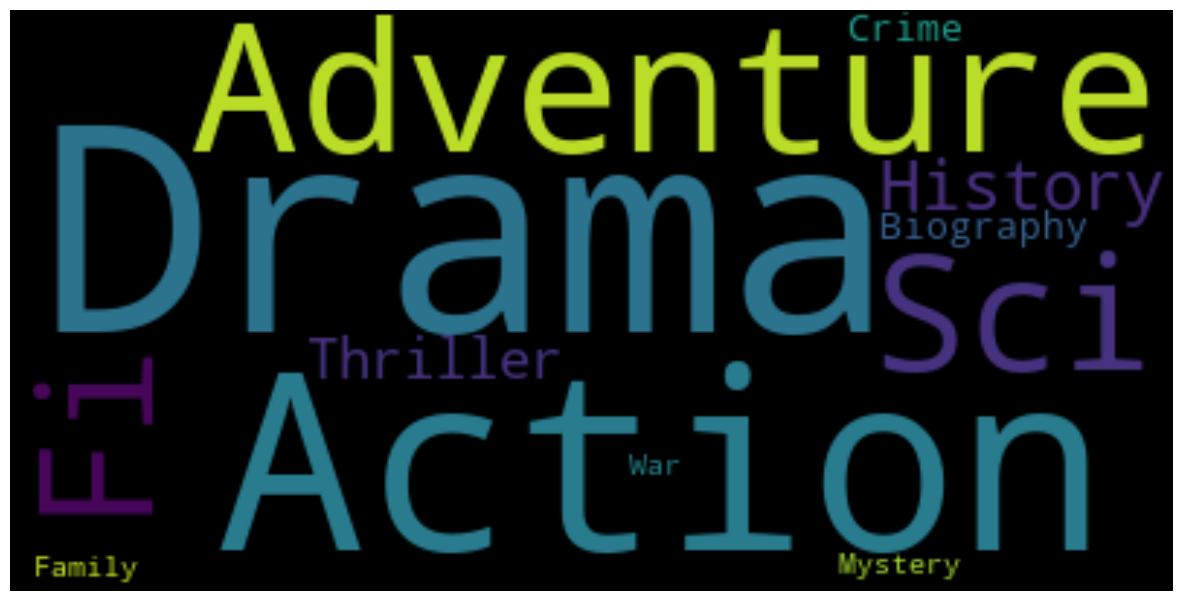

In [46]:
text = " ".join(i for i in data.Genre)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The code snippet generates a word cloud visualization based on the 'Genre' column in the `data` DataFrame, which contains movies directed by Steven Spielberg.

1. `text = " ".join(i for i in data.Genre)`: This line joins all the values in the 'Genre' column of the `data` DataFrame into a single string called `text`. Each value is separated by a space.

2. `stopwords = set(STOPWORDS)`: This line creates a set of stopwords using the `STOPWORDS` variable from the `wordcloud` library. Stopwords are commonly used words (e.g., "a", "the", "and") that are typically removed from text analysis to focus on more meaningful words.

3. `wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)`: This line creates a word cloud using the `WordCloud` class from the `wordcloud` library. The stopwords are passed as an argument, and the background color is set to black. The `generate()` function is called on `text` to generate the word cloud based on the frequency of words.

4. `plt.figure(figsize=(15,10))`: This line sets the size of the figure that will display the word cloud.

5. `plt.imshow(wordcloud, interpolation='bilinear')`: This line displays the word cloud image using the `imshow()` function from `matplotlib.pyplot`. The 'bilinear' interpolation is used to smooth the image.

6. `plt.axis("off")`: This line turns off the axes and axis labels.

7. `plt.show()`: This line displays the word cloud plot.

The resulting word cloud provides a visual representation of the most frequent words in the 'Genre' column of the `data` DataFrame, with more common words appearing larger in the word cloud. It helps to identify the genres that are most associated with movies directed by Steven Spielberg.

In [47]:
ratings_data=result[['Director','IMDB_Rating']]
ratings_data=ratings_data.groupby(by='Director').agg(np.mean)
ratings_data.sort_values(by='IMDB_Rating',ascending=False,inplace=True)


The code snippet calculates the average IMDB rating for each director in the `result` DataFrame and sorts the `ratings_data` DataFrame in descending order based on the IMDB ratings.

1. `ratings_data = result[['Director','IMDB_Rating']]`: This line creates a new DataFrame called `ratings_data` by selecting the 'Director' and 'IMDB_Rating' columns from the `result` DataFrame.

2. `ratings_data = ratings_data.groupby(by='Director').agg(np.mean)`: This line groups the `ratings_data` DataFrame by the 'Director' column and calculates the mean (average) IMDB rating for each director using the `agg()` function with `np.mean` as the aggregation function.

3. `ratings_data.sort_values(by='IMDB_Rating', ascending=False, inplace=True)`: This line sorts the `ratings_data` DataFrame in descending order based on the IMDB ratings using the `sort_values()` function. The `by` parameter specifies the column to sort by, and the `ascending` parameter is set to `False` to sort in descending order. The `inplace` parameter is set to `True` to modify the DataFrame directly.

The resulting `ratings_data` DataFrame contains the directors and their corresponding average IMDB ratings, sorted in descending order based on the ratings. This provides a summary of the directors with the highest average ratings.

In [48]:
ratings_data=ratings_data.head(10)
ratings_data

IMDB_Rating
Director                       
Frank Darabont             8.95
Irvin Kershner             8.70
Lana Wachowski             8.70
George Lucas               8.60
Roberto Benigni            8.60
Masaki Kobayashi           8.60
Thomas Kail                8.60
Sudha Kongara              8.60
Fernando Meirelles         8.60
Roger Allers               8.50

The code `ratings_data = ratings_data.head(10)` selects the top 10 rows from the `ratings_data` DataFrame, containing the directors with the highest average IMDB ratings.

By using the `head(10)` function, the DataFrame is filtered to include only the first 10 rows, representing the directors with the highest average ratings. This allows you to focus on the top-rated directors in terms of their average IMDB ratings.

In [49]:
fig = px.bar(data_frame=ratings_data, x=ratings_data.index, y='IMDB_Rating', template= "plotly_dark")
fig.show()

The code `fig = px.bar(data_frame=ratings_data, x=ratings_data.index, y='IMDB_Rating', template='plotly_dark')` creates a bar chart using Plotly Express to visualize the average IMDB ratings for the top 10 directors.

1. `fig = px.bar(data_frame=ratings_data, x=ratings_data.index, y='IMDB_Rating', template='plotly_dark')`: This line uses Plotly Express to create a bar chart. The `data_frame` parameter is set to `ratings_data` DataFrame. The 'Director' column (index) is mapped to the x-axis, and the 'IMDB_Rating' column is mapped to the y-axis. The `template` parameter sets the plot template to "plotly_dark" for a dark background.

2. `fig.show()`: This line displays the bar chart.

The resulting bar chart visually represents the average IMDB ratings for the top 10 directors. Each bar represents a director, and the height of the bar corresponds to their average IMDB rating. This allows for easy comparison and identification of the directors with the highest average ratings.

In [50]:
data1=result[result['Director']=='Frank Darabont']
data1=data1.sort_values(by='Released_Year')
data1

Series_Title  Released_Year Certificate  Runtime  \
0   The Shawshank Redemption           1994           A      142   
25            The Green Mile           1999           A      189   

                    Genre        Director        Star1                  Star2  \
0                   Drama  Frank Darabont  Tim Robbins         Morgan Freeman   
25  Crime, Drama, Fantasy  Frank Darabont    Tom Hanks  Michael Clarke Duncan   

          Star3           Star4  IMDB_Rating  Meta_score  No_of_Votes  \
0    Bob Gunton  William Sadler          9.3        80.0    2343110.0   
25  David Morse     Bonnie Hunt          8.6        61.0    1147794.0   

          Gross  
0    28341469.0  
25  136801374.0

The code filters the `result` DataFrame to select rows where the 'Director' column is equal to 'Frank Darabont'. The resulting DataFrame, `data1`, is then sorted in ascending order based on the 'Released_Year' column.

1. `data1 = result[result['Director']=='Frank Darabont']`: This line creates a new DataFrame called `data1` by selecting rows from the `result` DataFrame where the 'Director' column is equal to 'Frank Darabont'.

2. `data1 = data1.sort_values(by='Released_Year')`: This line sorts the `data1` DataFrame in ascending order based on the 'Released_Year' column.

The resulting `data1` DataFrame contains the movies directed by Frank Darabont, sorted by their release years in chronological order.

In [51]:
px.line(data1,x= 'Released_Year' , y = 'IMDB_Rating', title='Released Year vs. IMDB Rating', template= "plotly_dark")

The code `px.line(data1, x='Released_Year', y='IMDB_Rating', title='Released Year vs. IMDB Rating', template='plotly_dark')` creates a line plot using Plotly Express to visualize the relationship between the release year and IMDB ratings for movies directed by Frank Darabont.

1. `px.line(data1, x='Released_Year', y='IMDB_Rating', title='Released Year vs. IMDB Rating', template='plotly_dark')`: This line uses Plotly Express to create a line plot. The `data1` DataFrame is specified as the data source. The 'Released_Year' column is mapped to the x-axis, and the 'IMDB_Rating' column is mapped to the y-axis. The `title` parameter sets the title of the plot, and the `template` parameter sets the plot template to "plotly_dark" for a dark background.

This line plot allows you to visualize the trend of IMDB ratings over the years for movies directed by Frank Darabont. Each point represents a movie's IMDB rating, and the lines connect the points to show the overall trend. The plot is interactive and offers features such as zooming and hovering to explore the data further.

In [52]:
px.line(data1,x= 'Released_Year' , y = 'Gross', title='Released Year vs. Gross', template= "plotly_dark")

The code `px.line(data1, x='Released_Year', y='Gross', title='Released Year vs. Gross', template='plotly_dark')` creates a line plot using Plotly Express to visualize the relationship between the release year and gross earnings for movies directed by Frank Darabont.

1. `px.line(data1, x='Released_Year', y='Gross', title='Released Year vs. Gross', template='plotly_dark')`: This line uses Plotly Express to create a line plot. The `data1` DataFrame is specified as the data source. The 'Released_Year' column is mapped to the x-axis, and the 'Gross' column is mapped to the y-axis. The `title` parameter sets the title of the plot, and the `template` parameter sets the plot template to "plotly_dark" for a dark background.

This line plot allows you to visualize the trend of gross earnings over the years for movies directed by Frank Darabont. Each point represents a movie's gross earnings, and the lines connect the points to show the overall trend. The plot is interactive and offers features such as zooming and hovering to explore the data further.

In [53]:
fig = px.scatter(result, x="Released_Year", y="IMDB_Rating", color="Certificate", size="Gross",hover_name="Series_Title", hover_data=['Runtime','Genre','Director','Meta_score'])
fig.show()

The code `fig = px.scatter(result, x="Released_Year", y="IMDB_Rating", color="Certificate", size="Gross", hover_name="Series_Title", hover_data=['Runtime','Genre','Director','Meta_score'])` creates a scatter plot using Plotly Express to visualize the relationship between the release year, IMDB rating, and other variables from the `result` DataFrame.

1. `px.scatter(result, x="Released_Year", y="IMDB_Rating", color="Certificate", size="Gross", hover_name="Series_Title", hover_data=['Runtime','Genre','Director','Meta_score'])`: This line uses Plotly Express to create a scatter plot. The `result` DataFrame is specified as the data source. The 'Released_Year' column is mapped to the x-axis, the 'IMDB_Rating' column is mapped to the y-axis. The `color` parameter sets the color of the markers based on the 'Certificate' column. The `size` parameter determines the size of the markers based on the 'Gross' column. The `hover_name` parameter sets the column to be displayed when hovering over each marker, which is set to 'Series_Title' here. The `hover_data` parameter specifies additional columns to be displayed in the hover tooltip, including 'Runtime', 'Genre', 'Director', and 'Meta_score'.

This scatter plot allows you to explore the relationship between the release year, IMDB rating, certificate, gross earnings, and other information for each movie in the dataset. The color and size of the markers provide additional visual information, and the hover functionality provides detailed information when interacting with each marker.

In [54]:
result.groupby(by="Certificate")["Gross"].mean().sort_values()

Certificate
16          0.000000e+00
TV-14       0.000000e+00
TV-MA       0.000000e+00
TV-PG       3.555400e+04
Unrated     3.000000e+05
GP          7.089580e+05
Passed      3.676992e+06
Approved    3.790371e+06
PG          1.160320e+07
R           2.385025e+07
U/A         2.602096e+07
PG-13       3.351085e+07
G           4.133027e+07
U           5.222642e+07
A           5.837403e+07
UA          1.221531e+08
Name: Gross, dtype: float64

The code `result.groupby(by="Certificate")["Gross"].mean().sort_values()` groups the `result` DataFrame by the "Certificate" column and calculates the mean gross earnings for each certificate type. The resulting series is then sorted in ascending order based on the mean gross earnings.

1. `result.groupby(by="Certificate")["Gross"].mean()`: This line groups the `result` DataFrame by the "Certificate" column and calculates the mean gross earnings for each certificate type using the `mean()` function on the "Gross" column.

2. `.sort_values()`: This method sorts the resulting series in ascending order based on the mean gross earnings.

The resulting series displays the mean gross earnings for each certificate type in ascending order. This allows you to compare the average earnings across different certificate types.

# **Conclusion**

There is a positive relationship between the number of votes and IMDb rating, as well as between the number of votes and gross values.

Key points:

- Among the top 1000 movies, a significant portion were released between 2000 and 2020.
- The most common runtime for these movies falls within the range of 100 to 150 minutes.
- The most common IMDb rating for these movies is between 7.5 and 8.
- The five highest-rated movies are [provide the names of the movies].
- Comedy drama and crime drama are the most popular genres among the top 1000 movies.
- The top 5 grossing movies are [list the names of the movies].
- Despite the majority of movies being from 2000 to 2020, all of them have IMDb ratings ranging from 7.8 to 8.2. This could be due to the fact that newer movies tend to receive more votes, potentially leading to some misleading ratings for older movies.
- Movies with a "U" certificate are the most common, followed by "A," "UA," and "R" ratings.
- Alfred Hitchcock has the highest number of movies listed in the top 1000, followed by Steven Spielberg and Hayao Miyazaki.
- Steven Spielberg has the highest average IMDb rating among them, indicating successful projects. Further analysis can be found above.
- The most popular director, based on average IMDb rating, is Frank Darabont with a rating of 8.95. He is followed by Irvin Kershner and Lana Wachowski. 
 
